In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

# 1. Возьмите датасет Mortality and Water Hardness

In [4]:
df = pd.read_csv('C:\\Users\\kuznecov.ap\\Desktop\\piton\\18 Корреляция\\water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


# 2 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

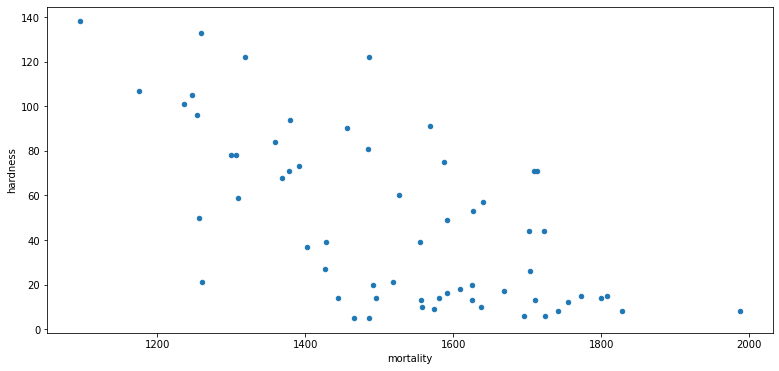

In [6]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [8]:
# корреляция Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# Корреляция Пирсона: отрицательная и умеренная (находится в диапазоне от 0.5 до 0.7). Это значит чем выше концетрация кальция, тем меньше смертность

In [9]:
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
# Корреляция Спирмена подтверждает выводы по Пирсону: отрицательная и заметная (находится в диапазоне от 0.5 до 0.7). Это значит чем выше концетрация кальция, тем меньше смертность

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df[['mortality']]
y = df['hardness']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train) # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [14]:
model.coef_

array([-0.12670202])

In [15]:
model.intercept_

239.3678426140957

In [18]:
y_pred = model.predict(X_test)
y_pred

array([81.3704298 , 41.96610311, 49.94833006, 23.72101293, 73.76830889,
       33.4770681 , 79.85000562, 38.29174467, 46.9074817 , 24.48122503,
       73.51490486, 51.21535021, 42.34620915, 11.30421546, 22.83409883,
       58.43736507, 31.95664392, 10.41730135, 82.76415197])

In [19]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.4948982822876836

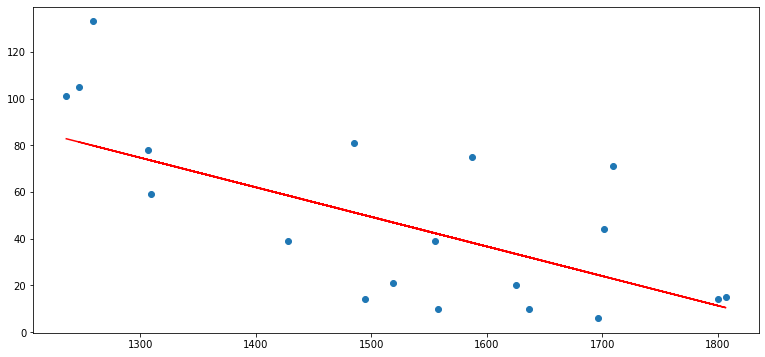

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

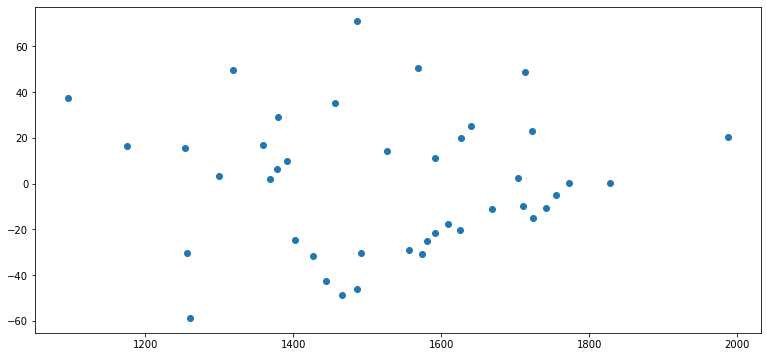

In [27]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# посмотрим на остатки
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

(array([3., 1., 9., 5., 6., 7., 5., 2., 3., 1.]),
 array([-58.7233036 , -45.75983806, -32.79637252, -19.83290698,
         -6.86944144,   6.0940241 ,  19.05748964,  32.02095518,
         44.98442072,  57.94788627,  70.91135181]),
 <BarContainer object of 10 artists>)

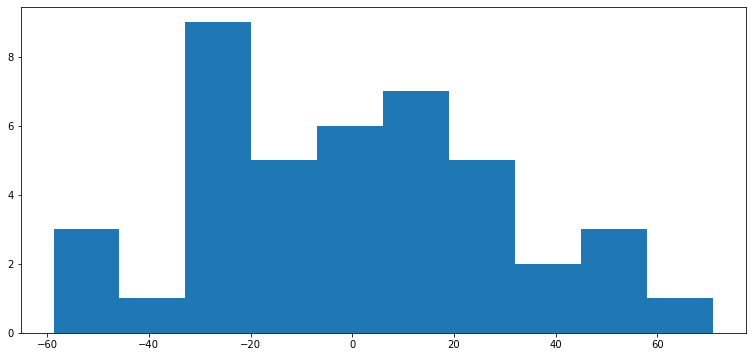

In [28]:
plt.hist(results.resid)

# 3 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [30]:
df_South = df[(df['location']=='South')]
df_North = df[(df['location']=='North')]
df_North.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

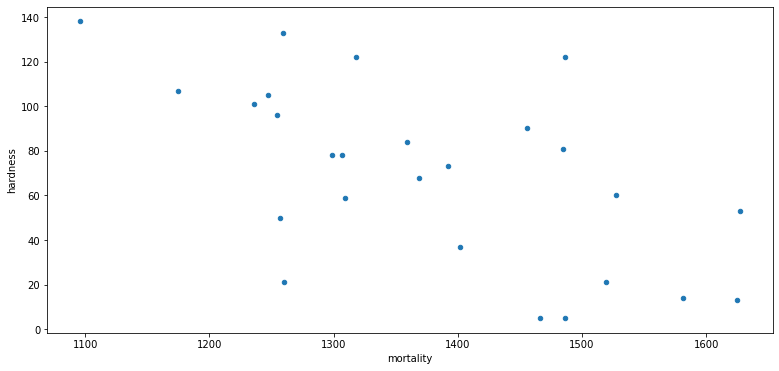

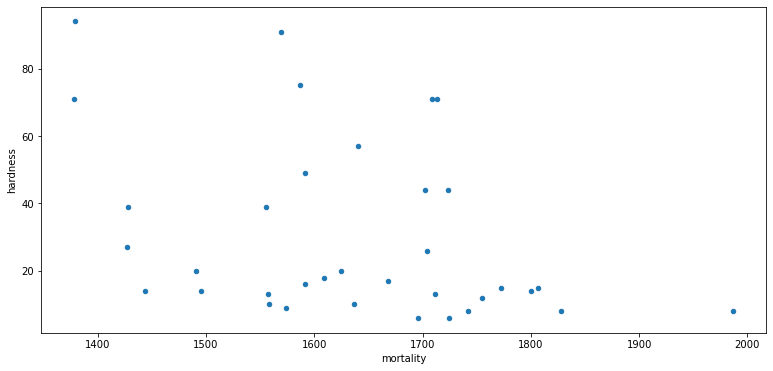

In [31]:
df_South.plot(kind='scatter', x='mortality', y='hardness')
df_North.plot(kind='scatter', x='mortality', y='hardness')

In [34]:
# корреляция Пирсона
df_South[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [35]:
df_North[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
# Для Юга корреляция заметная и отрицательная, для Севера умеренная и отрицательная. 

In [36]:
# корреляция Спирмена
df_South[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [37]:
df_North[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
# Для Юга корреляция заметная и отрицательная, для Севера умеренная и отрицательная. 

In [43]:
X_South = df_South[['mortality']]
y_South = df_South['hardness']
X_North = df_North[['mortality']]
y_North = df_North['hardness']

In [44]:
X_South_train, X_South_test, y_South_train, y_South_test = train_test_split(X_South, y_South, test_size=0.30, random_state=42)

In [45]:
X_North_train, X_North_test, y_North_train, y_North_test = train_test_split(X_North, y_North, test_size=0.30, random_state=42)

In [50]:
model_South = LinearRegression()
model_South.fit(X_South_train, y_South_train)
model_North = LinearRegression()
model_North.fit(X_North_train, y_North_train)

LinearRegression()

In [51]:
model_South.coef_
model_North.coef_

array([-0.09774218])

In [52]:
model_South.intercept_
model_North.intercept_

191.72797679112006

In [55]:
y_pred_South = model_South.predict(X_South_test)
y_pred_South

array([85.39221138, 54.96268708, 98.25230796, 54.96268708, 70.17744923,
       95.89764238, 87.02236446, 58.58524949])

In [57]:
y_pred_North = model_North.predict(X_North_test)
y_pred_North

array([-2.48573411, 37.88178607, 50.58826942, 23.22045913, 36.22016902,
       24.29562311, 25.37078708, 21.4610999 , 39.73888749, 18.52883451,
       52.1521443 ])

In [58]:
model_South.score(X_South_test, y_South_test)

-0.0522661579448378

In [59]:
model_North.score(X_North_test, y_North_test)

-0.34863672627416675

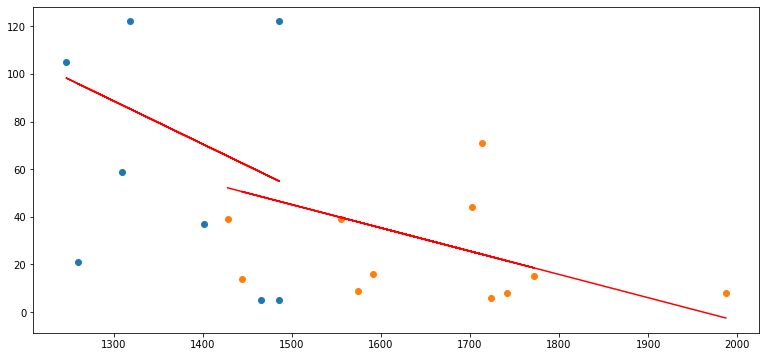

In [66]:
plt.scatter(X_South_test, y_South_test)
plt.plot(X_South_test, y_pred_South, c='r')
plt.scatter(X_North_test, y_North_test)
plt.plot(X_North_test, y_pred_North, c='r')

In [ ]:
# В целом можно сказать, что жесткость воды чаще встречается в южных штатах, но и количество смертей там меньше и теснота связи между коэффициентами корреляции там выше. И коэффициент детерминации в южных штатах выше, что может гововрить о более точной модели

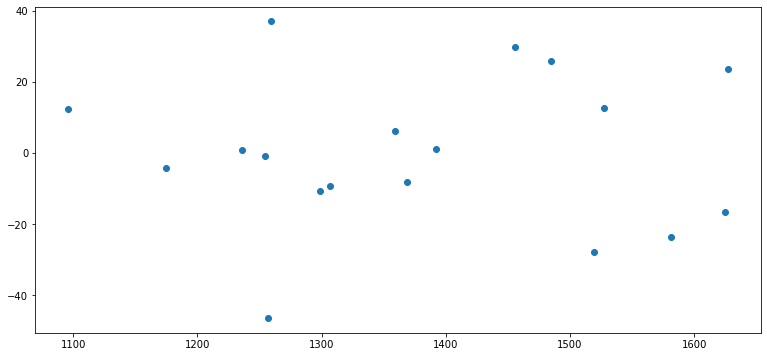

In [67]:
# посмотрим на остатки
X_const_South = sm.add_constant(X_South_train)
model_South = sm.OLS(y_South_train, X_const_South)
results_South = model_South.fit()
# посмотрим на остатки
plt.scatter(X_const_South.iloc[:, 1], results_South.resid)

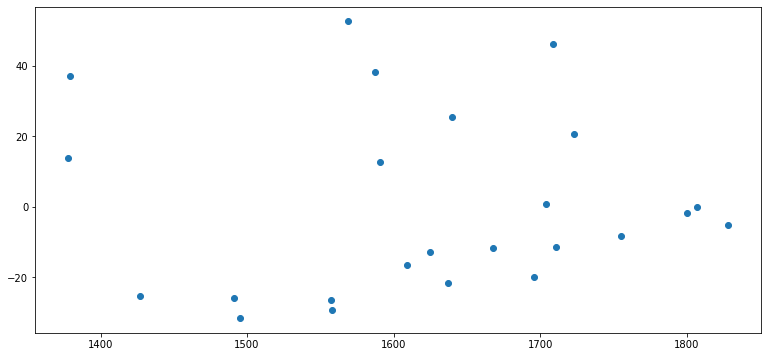

In [69]:
# посмотрим на остатки
X_const_North = sm.add_constant(X_North_train)
model_North = sm.OLS(y_North_train, X_const_North)
results_North = model_North.fit()
# посмотрим на остатки
plt.scatter(X_const_North.iloc[:, 1], results_North.resid)

(array([1., 0., 2., 1., 3., 4., 1., 2., 2., 2.]),
 array([-46.44102675, -38.10480112, -29.7685755 , -21.43234987,
        -13.09612425,  -4.75989863,   3.576327  ,  11.91255262,
         20.24877825,  28.58500387,  36.92122949]),
 <BarContainer object of 10 artists>)

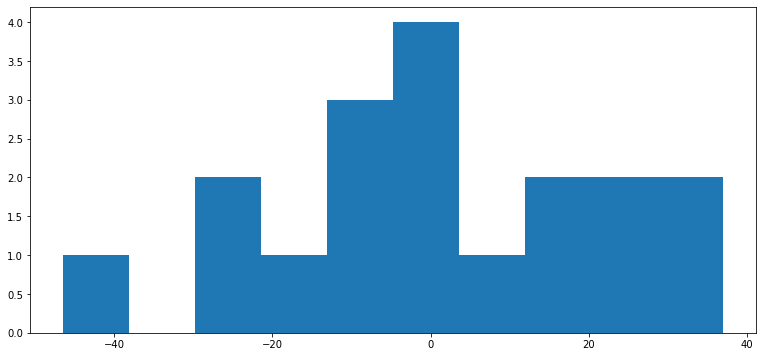

In [71]:
plt.hist(results_South.resid)

(array([5., 3., 4., 4., 0., 2., 2., 0., 2., 2.]),
 array([-31.60341826, -23.18012614, -14.75683401,  -6.33354188,
          2.08975025,  10.51304238,  18.93633451,  27.35962664,
         35.78291877,  44.2062109 ,  52.62950303]),
 <BarContainer object of 10 artists>)

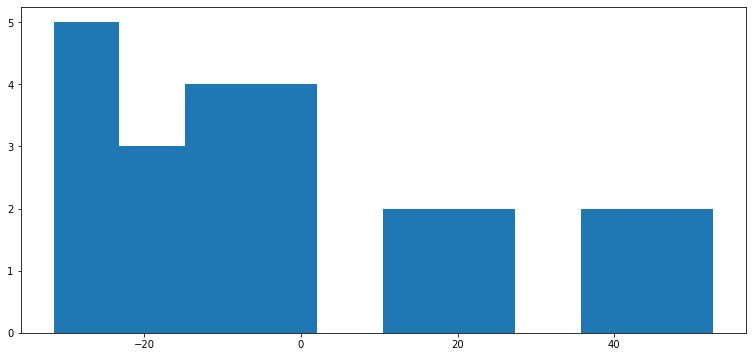

In [72]:
plt.hist(results_North.resid)

In [ ]:
# Для Северных штатов распределение остатков носит не "нормальное распределение"